In [5]:
import pandas as pd
from datetime import timedelta
%pylab inline

# I choose to look at Volkswagon (because they own Bugatti)
df_vow = pd.read_csv('assets/datasets/vow.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [6]:
df_vow.describe()

,Open,High,Low,Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,130.380000,132.168235,128.580588,130.415882,96009.898039
std,7.031538,6.992833,7.398405,7.308949,51570.127117
min,110.950000,111.000000,106.650000,108.950000,18273.000000
25%,127.000000,128.600000,125.275000,126.875000,63276.500000
50%,130.450000,131.950000,128.900000,130.450000,84373.000000
75%,134.475000,136.150000,132.575000,134.600000,114860.500000
max,154.050000,154.300000,149.950000,153.150000,374850.000000


In [7]:
df_vow.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

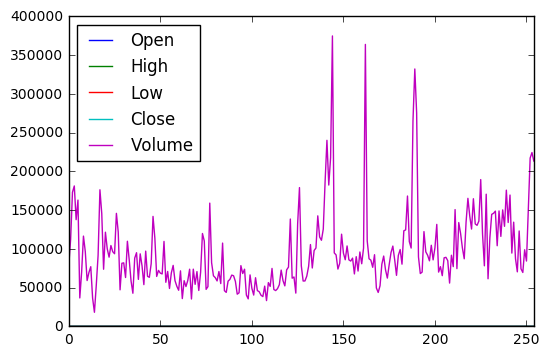

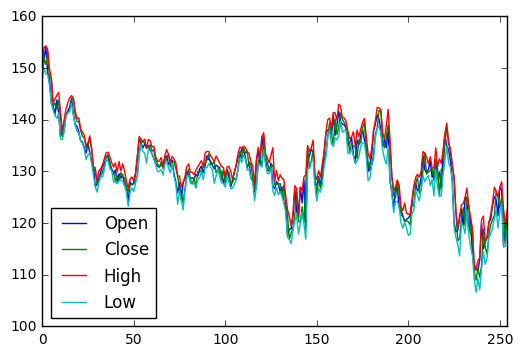

In [8]:
# We're plotting them all at once so... there are going to be some visual issues
df_vow.plot()
# Volume distorts the viz because those values are much larger than the prices.

# lets put all those other ones on a plot.
df_vow[['Open','Close','High','Low']].plot()

#### Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

**Unique Opening values**

In [9]:
df_vow['Open'].unique()

array([ 150.05,  151.85,  154.05,  149.05,  148.05,  143.2 ,  142.6 ,
        141.  ,  143.85,  141.3 ,  136.75,  137.65,  139.75,  141.65,
        142.4 ,  144.1 ,  141.2 ,  139.05,  138.7 ,  137.7 ,  135.9 ,
        135.7 ,  134.65,  133.55,  135.45,  133.7 ,  131.9 ,  130.85,
        127.15,  127.5 ,  128.75,  129.95,  131.  ,  131.5 ,  133.  ,
        132.75,  131.3 ,  130.5 ,  129.4 ,  130.3 ,  128.  ,  129.55,
        128.7 ,  127.2 ,  124.  ,  127.4 ,  127.8 ,  136.4 ,  135.4 ,
        134.55,  135.35,  134.5 ,  135.05,  134.15,  133.45,  132.5 ,
        130.95,  131.25,  132.65,  131.35,  131.85,  132.2 ,  129.5 ,
        125.85,  124.5 ,  128.6 ,  130.1 ,  129.2 ,  128.65,  129.1 ,
        129.7 ,  131.15,  133.05,  132.3 ,  132.  ,  131.2 ,  130.  ,
        127.7 ,  129.  ,  130.4 ,  127.  ,  128.4 ,  129.9 ,  131.1 ,
        132.7 ,  134.45,  134.05,  130.7 ,  126.  ,  134.  ,  131.4 ,
        136.7 ,  132.05,  130.2 ,  131.6 ,  126.65,  128.05,  126.1 ,
        123.95,  123

In [10]:
# Unique Peaks
df_vow['High'].unique()

array([ 150.7 ,  154.  ,  154.3 ,  153.65,  149.85,  148.15,  143.25,
        144.  ,  144.75,  145.3 ,  141.55,  137.65,  140.  ,  142.05,
        143.3 ,  144.2 ,  144.7 ,  141.8 ,  140.15,  140.4 ,  138.3 ,
        137.5 ,  137.05,  135.  ,  135.55,  136.9 ,  134.45,  130.95,
        130.7 ,  128.05,  130.15,  130.5 ,  131.3 ,  132.55,  133.65,
        133.7 ,  132.8 ,  131.65,  130.85,  129.9 ,  131.9 ,  130.1 ,
        131.5 ,  130.  ,  128.2 ,  126.75,  128.5 ,  128.95,  129.7 ,
        133.  ,  136.75,  136.25,  135.75,  134.5 ,  136.2 ,  135.9 ,
        134.75,  134.9 ,  132.85,  131.95,  132.  ,  132.7 ,  131.1 ,
        133.05,  134.25,  133.3 ,  131.85,  132.9 ,  132.4 ,  131.7 ,
        129.15,  129.1 ,  126.95,  127.85,  129.  ,  131.45,  129.85,
        129.8 ,  129.35,  130.3 ,  130.9 ,  132.1 ,  133.55,  133.9 ,
        133.85,  131.8 ,  132.3 ,  131.6 ,  130.75,  131.  ,  128.4 ,
        131.35,  133.5 ,  134.6 ,  133.45,  131.05,  127.5 ,  132.2 ,
        134.65,  136

In [11]:
# Unique Lows
df_vow['Low'].unique()

array([ 147.75,  149.95,  148.85,  148.8 ,  146.6 ,  143.2 ,  141.85,
        140.85,  140.25,  141.3 ,  136.3 ,  136.15,  137.7 ,  140.65,
        141.35,  141.55,  143.15,  141.  ,  139.  ,  137.75,  137.45,
        135.9 ,  135.45,  134.3 ,  132.3 ,  133.25,  133.55,  131.5 ,
        129.25,  127.  ,  126.  ,  127.9 ,  129.15,  128.9 ,  130.4 ,
        132.6 ,  131.9 ,  130.5 ,  130.15,  128.05,  127.6 ,  128.2 ,
        128.35,  128.1 ,  127.2 ,  125.95,  123.25,  125.85,  126.85,
        126.1 ,  127.7 ,  133.3 ,  135.15,  133.9 ,  133.5 ,  131.6 ,
        134.35,  134.  ,  133.35,  132.5 ,  131.35,  130.  ,  130.35,
        129.3 ,  132.1 ,  130.65,  129.75,  129.  ,  127.65,  123.65,
        126.15,  124.5 ,  122.55,  126.25,  129.2 ,  128.6 ,  128.75,
        128.4 ,  130.8 ,  130.7 ,  130.9 ,  130.25,  129.05,  130.45,
        127.8 ,  126.95,  128.  ,  126.65,  126.75,  127.55,  130.55,
        132.55,  131.7 ,  133.1 ,  132.45,  127.85,  124.35,  131.15,
        131.25,  134

In [12]:
# Unique Closings
df_vow['Close'].unique()

array([ 148.4 ,  151.75,  150.7 ,  153.15,  148.1 ,  148.05,  142.6 ,
        143.25,  142.05,  143.75,  140.9 ,  136.75,  137.95,  141.15,
        141.4 ,  141.85,  143.8 ,  144.2 ,  139.7 ,  139.65,  136.8 ,
        136.55,  134.6 ,  134.85,  136.3 ,  134.45,  130.8 ,  130.  ,
        127.55,  128.1 ,  129.2 ,  129.95,  130.9 ,  132.6 ,  133.25,
        131.75,  130.2 ,  130.05,  128.05,  129.1 ,  128.2 ,  129.8 ,
        128.7 ,  126.9 ,  126.  ,  127.4 ,  127.6 ,  133.55,  136.  ,
        135.65,  135.55,  134.8 ,  135.15,  133.9 ,  134.25,  132.1 ,
        131.5 ,  130.7 ,  131.9 ,  130.55,  132.05,  132.5 ,  133.3 ,
        131.95,  130.6 ,  129.15,  126.5 ,  126.35,  123.95,  126.6 ,
        129.05,  130.45,  128.3 ,  128.75,  126.85,  130.3 ,  130.85,
        131.7 ,  132.15,  133.4 ,  131.35,  131.8 ,  129.7 ,  128.4 ,
        130.35,  129.65,  127.65,  127.9 ,  133.85,  131.15,  131.55,
        126.55,  127.15,  132.  ,  132.65,  132.85,  130.1 ,  131.3 ,
        127.5 ,  125

In [13]:
# Unique Volumes
df_vow['Volume'].unique()

array([ 79341, 112464, 173155, 181285, 137786, 163025,  36778,  69801,
       116569,  96699,  59235,  69726,  77082,  36553,  18273,  53063,
        91792, 176337, 145677,  73815, 121600, 100117,  89414, 104396,
        96429,  93825, 145919, 121867,  47258,  81542,  82043,  63143,
       109929,  85911,  58685,  42838,  88199,  95136,  60724,  93676,
        78216,  53957,  97192,  64681,  63410,  81052, 141980, 113974,
        64536,  72283,  68776,  67758, 109697,  56974,  70972,  49018,
        69012,  78772,  59150,  51876,  46705,  71741,  35962,  59038,
        51476,  59448,  73864,  35416,  73911,  54316,  70782,  46444,
        69972, 119918, 110331,  47852,  51407, 159139,  82209,  65406,
        62972,  58729,  70867,  55302, 107563,  46143,  43946,  58470,
        60719,  66249,  65405,  58118,  41623,  43436,  78462,  68290,
        73856,  40521,  35575,  66513,  49126,  40496,  62852,  46252,
        44800,  40232,  38533,  52021,  33351,  56553,  51642,  74867,
      

In [14]:
# Unique Dates
df_goog['Date'].unique()

NameError: name 'df_goog' is not defined

#### Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [15]:
df_vow.head()

,Date,Open,High,Low,Close,Volume
0,16-Jan-17,150.05,150.70,147.75,148.40,79341
1,13-Jan-17,151.85,154.00,149.95,151.75,112464
2,12-Jan-17,154.05,154.30,148.85,150.70,173155
3,11-Jan-17,149.05,153.65,148.80,153.15,181285
4,10-Jan-17,148.05,149.85,146.60,148.10,137786


In [16]:
df_vow.columns.values
# Apparently the Date column is lying about its real name.  Going to have to legally change it.

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [17]:
df_vow.columns = ['Date','Open','High','Low','Close','Volume']
df_vow.columns.values


array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [18]:
# The object type in the date column is a bunch of strings.  Or at least the first one is.
df_vow['Date']
type(df_vow['Date'].loc[0])

str

#### We need to convert the string to a DateTime object. Pandas has a built in function for this! Easy peasy. We should also ensure that the dates are sorted.

In [19]:
df_vow.sort_values('Date', inplace=True)
df_vow.set_index('Date', inplace=True)
df_vow.index = df_vow.index.to_datetime()

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  app.launch_new_instance()


In [20]:
df_vow.head()

,Open,High,Low,Close,Volume
2016-04-01,127.00,127.15,122.45,123.35,77122
2016-08-01,134.00,134.65,131.15,132.00,52354
2016-12-01,128.75,130.15,127.90,128.10,63143
2016-02-01,120.75,121.65,117.90,119.70,70452
2016-07-01,122.40,126.65,121.50,126.00,125608


This is a great example of order of operations. We sorted before we converted to a datetime so we were sorting the dates as strings and they did not come out in the order we wanted.  If you go to the previous cell you'll see that we sort, set as index and then convert to datetime.

#### Let's add some more columns with useful data extracted from the DateTime index.

In [21]:
df_vow['Year'] = df_vow.index.year
df_vow['Month'] = df_vow.index.month
df_vow['Day'] = df_vow.index.day

In [22]:
df_vow.head()

,Open,High,Low,Close,Volume,Year,Month,Day
2016-04-01,127.00,127.15,122.45,123.35,77122,2016,4,1
2016-08-01,134.00,134.65,131.15,132.00,52354,2016,8,1
2016-12-01,128.75,130.15,127.90,128.10,63143,2016,12,1
2016-02-01,120.75,121.65,117.90,119.70,70452,2016,2,1
2016-07-01,122.40,126.65,121.50,126.00,125608,2016,7,1


In [23]:
# We could also use the index to get some categorical information 
print df_vow.index.weekday_name[:5]


['Friday' 'Monday' 'Thursday' 'Monday' 'Friday']


#### Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [24]:

# Two possible solutions:
# If the comparison statement is True it will append a True bool to the new column.  Otherwise it will be a false.
df_vow['Closed_Higher'] = df_vow.Open > df_vow.Close

#Converts the Bool True False column to 1s and 0s
df_vow['Closed_Higher'] = pd.get_dummies(df_vow.Open > df_vow.Close).values

In [25]:
df_vow.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Closed_Higher
2016-04-01,127.00,127.15,122.45,123.35,77122,2016,4,1,0
2016-08-01,134.00,134.65,131.15,132.00,52354,2016,8,1,0
2016-12-01,128.75,130.15,127.90,128.10,63143,2016,12,1,0
2016-02-01,120.75,121.65,117.90,119.70,70452,2016,2,1,0
2016-07-01,122.40,126.65,121.50,126.00,125608,2016,7,1,1


#### We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2017, we would do as such:

In [26]:
df_vow['2017']

,Open,High,Low,Close,Volume,Year,Month,Day,Closed_Higher
2017-01-10,148.05,149.85,146.60,148.10,137786,2017,1,10,1
2017-01-11,149.05,153.65,148.80,153.15,181285,2017,1,11,1
2017-01-12,154.05,154.30,148.85,150.70,173155,2017,1,12,0
2017-01-13,151.85,154.00,149.95,151.75,112464,2017,1,13,0
2017-01-16,150.05,150.70,147.75,148.40,79341,2017,1,16,0
2017-01-02,136.75,141.55,136.30,140.90,59235,2017,1,2,1
2017-01-03,141.30,145.30,141.30,143.75,96699,2017,1,3,1
2017-01-04,143.85,144.75,140.25,142.05,116569,2017,1,4,0
2017-01-05,141.00,144.00,140.85,143.25,69801,2017,1,5,1
2017-01-06,142.60,143.25,141.85,142.60,36778,2017,1,6,1


#### Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

In [27]:
df_vow.index + timedelta(days=1)

DatetimeIndex(['2016-04-02', '2016-08-02', '2016-12-02', '2016-02-02',
               '2016-07-02', '2016-06-02', '2016-03-02', '2016-11-02',
               '2016-09-02', '2016-08-11',
               ...
               '2016-09-09', '2016-08-10', '2016-12-10', '2016-02-10',
               '2017-01-10', '2016-06-10', '2016-03-10', '2016-05-10',
               '2016-11-10', '2016-09-10'],
              dtype='datetime64[ns]', length=255, freq=None)

#### On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [28]:
# Plus/Minus 1 hour
df_vow.index + timedelta(hours=1)
df_vow.index - timedelta(hours=1)

# Plus/Minus 3 Days
df_vow.index + timedelta(days=3)
df_vow.index - timedelta(days=3)

# Plus/Minus 12 years, 1 hour and 43 seconds
df_vow.index + timedelta(days=4380, hours=1, seconds=43)
df_vow.index - timedelta(days=4380, hours=1, seconds=43)

DatetimeIndex(['2004-04-03 22:59:17', '2004-08-03 22:59:17',
               '2004-12-03 22:59:17', '2004-02-03 22:59:17',
               '2004-07-03 22:59:17', '2004-06-03 22:59:17',
               '2004-03-03 22:59:17', '2004-11-03 22:59:17',
               '2004-09-03 22:59:17', '2004-08-12 22:59:17',
               ...
               '2004-09-10 22:59:17', '2004-08-11 22:59:17',
               '2004-12-11 22:59:17', '2004-02-11 22:59:17',
               '2005-01-11 22:59:17', '2004-06-11 22:59:17',
               '2004-03-11 22:59:17', '2004-05-11 22:59:17',
               '2004-11-11 22:59:17', '2004-09-11 22:59:17'],
              dtype='datetime64[ns]', length=255, freq=None)

![Nicee](../assets/images/nice.jpg)

## Discussion: Date ranges and Frequencies

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


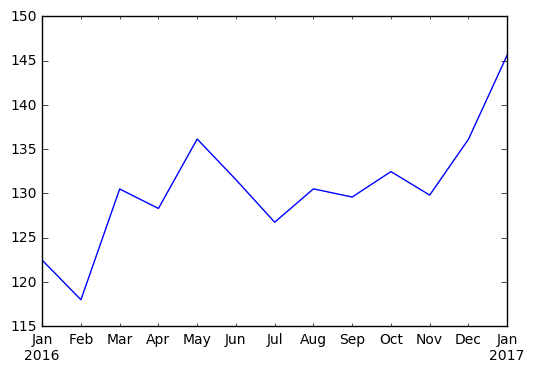

In [29]:
df_vow.Open.resample('M').plot()


Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
> - _Convert TimeSeries to specified frequency._

- What does `resample` do?
> - _Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword._

- What is the difference?


- When would we want to use each?



We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

In [30]:
index = pd.date_range('3/1/2016', '6/1/2016')

# Specifify a start point and how many periods after
pd.date_range(start='3/1/2016', periods=20)

#Specify a end point and how many periods before
pd.date_range(end='6/1/2016', periods=20)

# Frequency specifyins the length of the periods the default 'D' being daily.  I imagine BM is Bi-Monthly
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

pd.date_range('3/7/2016 12:56:31', periods=6)
# normalize creates normal daily times, and will make the default time for each day midnight.
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

In [31]:
# March 2016 was our start period, and the period frequency is months.
march_2016 = pd.Period('2016-03', freq='M')

print march_2016.start_time
print march_2016.end_time

2016-03-01 00:00:00
2016-03-31 23:59:59.999999999


Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.